In [1]:
import numpy as np
from numpy import sin, sqrt, absolute
import matplotlib.pyplot as plt
from tqdm import tqdm
from IPython.core.display import display, HTML
from scipy.spatial.distance import cdist
display(HTML("<style>.container { width:100% !important; }</style>"))

### Question 1: Particle Swarm Optimization I

In [2]:
def f(X):
    return np.sum([-a * sin(sqrt(absolute(a))) for a in X])

In [3]:
n_particles = 3
a1, a2 = 1, 1
X = np.array([[-400,-400],[-410,-410],[-415,-415]])
ind_best = np.copy(X)
social_best = X[2]
V = np.array([[-50,-50],[-50,-50],[-50,-50]])
r1, r2 = 0.5, 0.5

# compute fitness of each particle
fitness = np.zeros(n_particles)
for i in range(n_particles):
    fitness[i] = f(X[i])
print(f'Fitness of the three particles: \n{fitness}\n\n')


## Perform first iteration for differen w values
W = np.array([2, 0.5, 0.1])
for w in W:
    X_new = np.zeros((n_particles, 2))
    V_new = np.zeros((n_particles,2))
    fitness = np.zeros(n_particles)
    # Update positions
    for i in range(n_particles):
        V_new[i] = w*V[i] + a1*r1*(ind_best[i]-X[i]) + a2*r2*(social_best-X[i])
        new_pos = X[i] + V_new[i]
        new_pos = np.clip(new_pos, -500, 500)
        X_new[i] = new_pos
        fitness[i] = f(X_new[i])
    

    
    # compute new fitness for all particles
    print(f'w: {w}')
    print(f'New position: {X_new}')
    print(f'New fitness: {fitness}')
    print('----------------------------------------')

Fitness of the three particles: 
[730.35620058 807.91509296 829.01175839]


w: 2.0
New position: [[-500. -500.]
 [-500. -500.]
 [-500. -500.]]
New fitness: [-361.17831706 -361.17831706 -361.17831706]
----------------------------------------
w: 0.5
New position: [[-432.5 -432.5]
 [-437.5 -437.5]
 [-440.  -440. ]]
New fitness: [804.48223093 769.49477167 747.52970442]
----------------------------------------
w: 0.1
New position: [[-412.5 -412.5]
 [-417.5 -417.5]
 [-420.  -420. ]]
New fitness: [819.99054728 834.93513654 837.72903522]
----------------------------------------


## 1c. 
The effect of the $w$ parameter is the weight of inertia: if $w$ is high, then the particle will move more towards its current location. If $w$ is low, more weight will be given to the local best solution and the global best solution. 

This can best be seen by breaking the update rule for the velocity into three parts: \\
$ v_i = \overbrace{\omega v_i}^\text{Intertia} + \overbrace{\alpha_1 r_1\cdot(\hat{x_i}-x_i)}^\text{Local best} + \overbrace{\alpha_2 r_2\cdot(\hat{g}-x_i)}^\text{Global best}$ 

The larger $\omega$ becomes, the more the first part (inertia) is weighted and the more influential it becomes on the update step. As a consequence, the individual and social bests are of less importance. The reduced importance of the individual best will decrease the local search ability, while the reduced importance of the global bes will decrease speed of convergence of the algorithm. 


## 1d. 
An advantage of a high value os $w$ is that exploration is enforced more. Because the particles are more driven by their own velocity rather than their individual best or the social best, more diversity in solutions is obtained.

A disadvantage is that the algorithm will have less exploitation: many directions in which no solution is present will be searched, and it takes a long time until the swarm converges to the same solution. In addition, the ability of the method to perform local search becomes weaker since it is more driven by its current velocity rather than by the best individual solution.


### Question 2

In [4]:
def PSO(f, n, D, w, a1, a2, X_init=None, V_init=None, max_iter = 10):
    """
    f: function to evaluate
    n: number of particles
    D: dimensions of the problem space
    w: inertia weight
    a1: local best weight
    a2: global best weight
    X_init: initial positions
    V_init: initial velocities
    minimization: Bool: true if minization problem
    max_iter: maximum iterations of the algorithm
    """
    # Initialize particles, velocities
    X = np.random.uniform(-500, 500, (n,D)) if X_init is None else X_init
    V = np.random.uniform(-500, 500, (n,D)) if V_init is None else V_init 

    # initialize current best, global best
    x_hat = X
    g_hat = x_hat[np.argmin([f(x_i) for x_i in x_hat])]
    # Compute statistics
    loss = np.zeros((max_iter))
    loss[0] = f(g_hat)

    n_iter = 0
    while n_iter<max_iter-1:
        n_iter += 1
        
        # Update positions
        R1, R2 = np.random.uniform(0,1,n), np.random.uniform(0,1,n)
        V = w*V + a1*R1*(x_hat-X) + a2*R2*(g_hat-X) # element-wise multiplication
        X += V
            
        # Update local and global bests
        for i in range(n):
            x_hat[i] = X[i] if f(X[i]) < f(x_hat[i]) else x_hat[i]
            g_hat = X[i] if f(X[i]) < f(g_hat) else g_hat
        loss[n_iter] = f(g_hat)
            
    return g_hat, loss

Optimal value: 16.097. Loss: 259.128


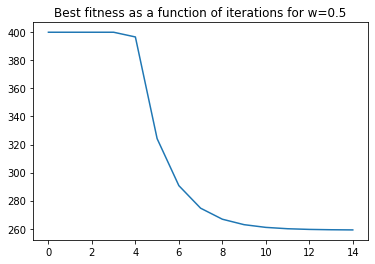

Optimal value: 3.477. Loss: 12.087


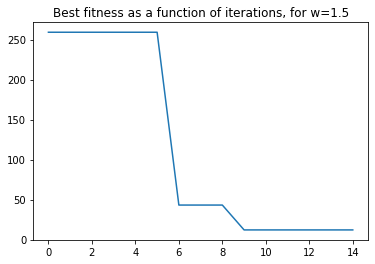

In [5]:
## parameters
def f(x):
    return x**2

n_iter = 15
n_particles, D = 1, 1
V = np.array([10.])
X = np.array([20.])
a1, a2 = 1.5, 1.5

## w < 1
w = 0.5
sol, loss = PSO(f, n_particles, D, w, a1, a2, X, V, max_iter=n_iter)
print(f'Optimal value: {round(sol,3)}. Loss: {round(loss[-1],3)}')
plt.plot(np.arange(n_iter), loss)
plt.title(f'Best fitness as a function of iterations for w={w}')
plt.show()


## w >= 1
w = 1.5
sol, loss = PSO(f, n_particles, D, w, a1, a2, X, V, max_iter=n_iter)
print(f'Optimal value: {round(sol,3)}. Loss: {round(loss[-1],3)}')
plt.plot(np.arange(n_iter), loss)
plt.title(f'Best fitness as a function of iterations, for w={w}')
plt.show()


When $w<1$, the algorithm gets stuck for a short number of iterations as it has to adjust its velocity to the correct direction. It then smoothly converges to the global minimum ($x^*=0$). When $w>1$, the particle is stuck for more iterations in the wrong direction. However, once it starts to decrease it almost immeidately converges to the global minimum $x^*$. 

This is sensible, as the lower value for $w$ causes the algorithm to be less influenced by its own velocity (inertia), meaning it is faster to adopt but slower to converge. It is also sensible that the higher value for $w$ converges faster, as it is slower to adopt but once it adopts it goes down with much more velocity. 

Important to note is that the results do not always converge to 0, and can be influenced by the sampled values for r1 and r2. Once the velocity decreases, there appears to be no more way to converge to the optimum by sampling the 'right' values for r1 and r2.

## Question 3

In [161]:

X = np.array([[2.6,2.6],[1.5,1.5]])
centroids = np.array([[2,2],[3,3]])

quantization_error(X,centroids)

[[0.84852814 0.56568542]
 [0.70710678 2.12132034]]
[1 0]
cluster 0
0, [0.70710678]
0.7071067811865476
cluster 1
1, [0.56568542]
0.5656854249492379


0.6363961030678927

In [144]:
print(np.linalg.norm(np.array([2.5,2.5])-np.array([3,3])))

0.7071067811865476


In [275]:
def quantization_error(X, centroids):
    """
    Compute Quantization error for a set of clusters (i.e. one particle)
    """
    ## calculate euclidean distance to clusters 
    dist = cdist(X, centroids)
    cluster_idx = np.argmin(dist, axis=1)

    # For each cluster, compute the sum of distances of x_i that belong to it and divide by total number of x_i that belong to the cluster
    fitness = 0
    n_j = 0
    for i, c in enumerate(centroids):
        # get all datapoints that belong to that cluster
        if len(cluster_idx[cluster_idx==i])>0:
            n_j += 1
            C_ij = dist[cluster_idx==i,i]            
            fitness += np.sum(C_ij,axis=0)/C_ij.shape[0]
            
    
    # divide end result by Nc
    fitness = fitness/n_j
    return fitness
    
    
def PSO_clustering(f, X, Nc, Np, w, a1, a2, max_iter=10, convergence_crit=0.0001):
    """
    X: data matrix (N, Nd)
    Nc: number of clusters
    Np: number of particles
    w: inertia weight
    a1: local best weight
    a2: global best weight
    max_iter: maximum iterations of the algorithm
    """
    No, Nd = X.shape
    ## Initialize particles, velocities
    C = np.random.uniform(-2, 2, (Np,Nc,Nd)) + np.array([np.mean(X[:,i]) for i in range(X.shape[1])])
    V = np.random.uniform(-0.2, 0.2, (Np,Nc,Nd)) 

    ## initialize current best, global best
    x_hat = np.copy(C)
    gmax = np.copy(x_hat[np.argmin([quantization_error(X, c_i) for c_i in C])])
    
    ## Compute statistics
    loss = np.zeros((max_iter))
    loss[0] = f(X, gmax)

    n_iter = 0
    while n_iter<max_iter-1:# or (loss[n]-loss[n-1]<convergence_crit and n!=0):
        n_iter += 1
        
        ## Update positions
        R1, R2 = np.random.uniform(0,1,Np), np.random.uniform(0,1,Np)
        V = w*V + (a1*R1*(x_hat-C).T).T + (a2*R2*(gmax-C).T).T
        C += V
            
        # Update local and global bests
        for i in range(Np):
            f_i = f(X, C[i]) 
            x_hat[i] = np.copy(C[i]) if f_i < f(X, x_hat[i]) else x_hat[i]        
            gmax = np.copy(C[i]) if f_i < f(X, gmax) else gmax
            
            
        loss[n_iter] = f(X, gmax)
            
    return gmax, loss

def kmeans(X, Nc, max_iter=10, convergence_crit=0.0001):
    """
    X: data matrix (N, Nd)
    Nc: number of clusters
    Np: number of particles
    max_iter: maximum iterations of the algorithm
    """
    ## initialize clusters
    No, Nd = X.shape
    C = np.random.uniform(-.5, .5, (Nc,Nd)) + np.array([np.mean(X[:,i]) for i in range(X.shape[1])])

    n_iter = 0
    while n_iter<max_iter-1:# or (loss[n]-loss[n-1]<convergence_crit and n!=0):
        n_iter += 1
        
        # Get distances
        dist = cdist(X, C)
        cluster_idx = np.argmin(dist, axis=1)
        for i in range(Nc):
            if len(cluster_idx[cluster_idx==i])>0:
                C[i] = np.mean(X[cluster_idx==i],axis=0)
                
    return C, quantization_error(X,C)
    

In [276]:
def visualize_clusters(X, D, gmax=None):
    D = 4
    fig, ax = plt.subplots(D,D,figsize=(8,8))

    for i in range(D):
        for j in range(D):
            if i==j: 
                continue
            ax[i,j].scatter(X[:,i], X[:,j])
            if gmax is not None:
                ax[i,j].scatter(gmax[:,i], gmax[:,j], color='red')
            ax[i,j].set_xlabel(f'Dim. {j+1}')
            ax[i,j].set_ylabel(f'Dim. {i+1}')

    plt.tight_layout()


In [241]:
## Download iris data
from sklearn import datasets
X = np.array(datasets.load_iris().data)

## Iris data K means

Loss: 0.6482198686270392


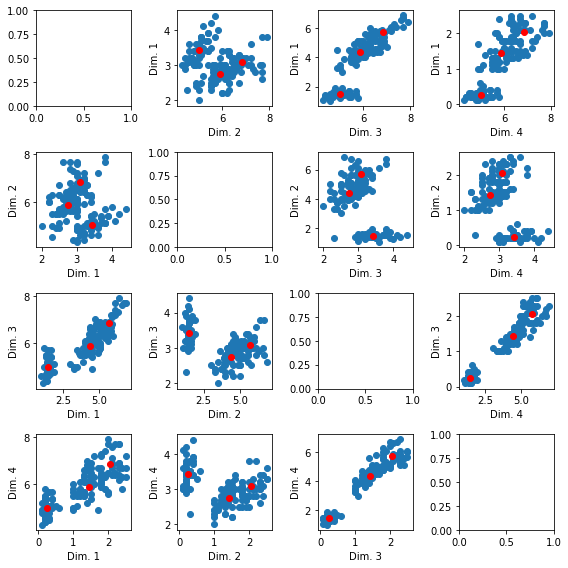

In [267]:
## Kmeans
C, loss = kmeans(X, 3, 100)
print(f'Loss: {loss}')
visualize_clusters(X,D,C)
plt.show()

## Iris data PSO

gmax clusters: [[ 6.289  5.017  3.489 -0.576]
 [ 6.231  2.927  4.855  1.68 ]
 [ 5.022  3.408  1.472  0.253]]. Loss: 0.769


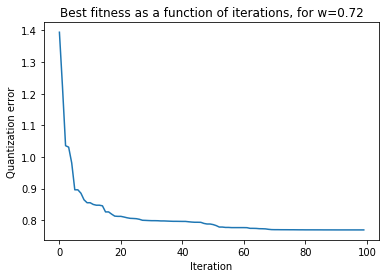

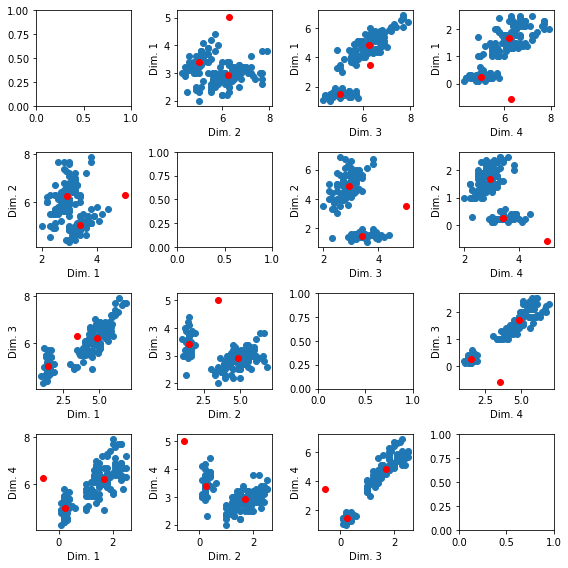

In [279]:
## set parameters
Nc, Np = 3, 30
w = 0.72
a1, a2 = 1.49, 1.49
n_iter = 100

## run algorithm
gmax, loss = PSO_clustering(quantization_error, X, Nc, Np, w, a1, a2, max_iter=n_iter, convergence_crit=0.0001)
print(f'gmax clusters: {np.round(gmax,3)}. Loss: {np.round(loss[-1],3)}')
plt.plot(np.arange(len(loss)), loss)
plt.title(f'Best fitness as a function of iterations, for w={w}')
plt.xlabel('Iteration')
plt.ylabel('Quantization error')
plt.show()

# Visualize clusters
visualize_clusters(X, D, gmax)
plt.show()

## Artificial data 1 k means

(400, 2)


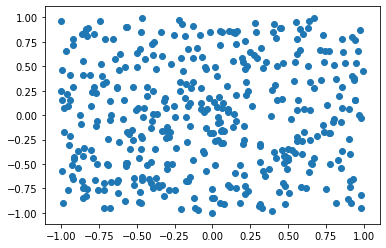

In [277]:
z1, z2 = np.random.uniform(-1,1,400),np.random.uniform(-1,1,400)
Z = np.reshape(np.append(z1,z2),(400,2))
print(Z.shape)
plt.scatter(Z[:,0], Z[:,1])
plt.show()

Loss: 0.3801045079259262


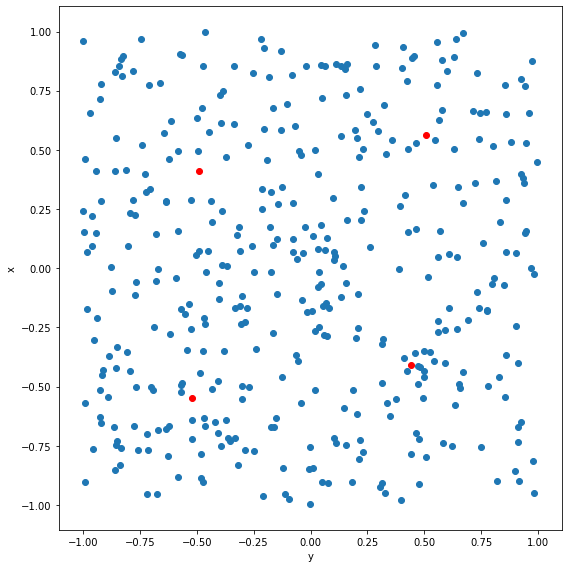

In [283]:
## Kmeans
C, loss = kmeans(Z, 4, 100)
print(f'Loss: {loss}')
fig, ax = plt.subplots(1,1,figsize=(8,8))
ax.scatter(Z[:,0], Z[:,1])
ax.scatter(C[:,0], C[:,1], color='r')
ax.set_xlabel(f'y')
ax.set_ylabel(f'x')   
plt.tight_layout()
plt.show()

## Artificial data 1 PSO

gmax clusters: [[ 0.184  0.346]
 [ 0.143 -0.908]
 [-0.346 -0.411]
 [ 0.533 -0.475]]. Loss: 0.388


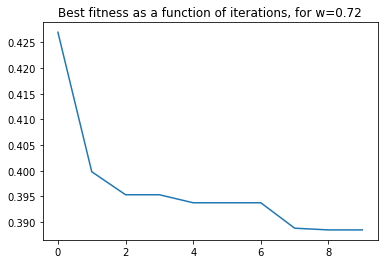

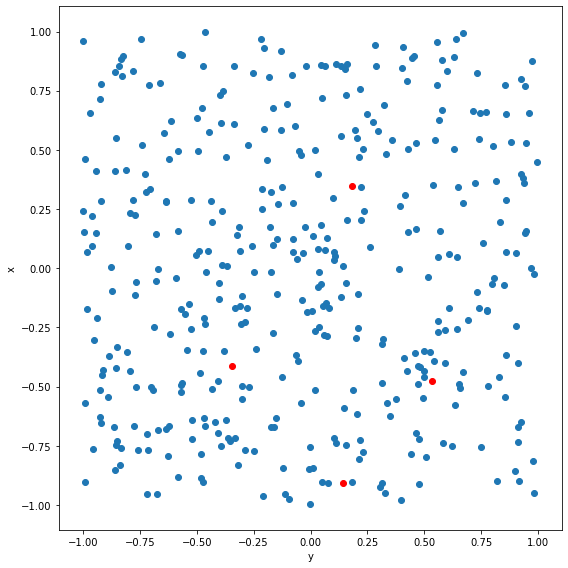

In [285]:
## set parameters
Nc, Np = 4, 100
w = 0.72
a1, a2 = 1.49, 1.49
n_iter = 10

## run algorithm
gmax, loss = PSO_clustering(quantization_error, Z, Nc, Np, w, a1, a2, max_iter=n_iter, convergence_crit=0.0001)
print(f'gmax clusters: {np.round(gmax,3)}. Loss: {np.round(loss[-1],3)}')
plt.plot(np.arange(len(loss)), loss)
plt.title(f'Best fitness as a function of iterations, for w={w}')
plt.show()

fig, ax = plt.subplots(1,1,figsize=(8,8))
ax.scatter(Z[:,0], Z[:,1])
ax.scatter(gmax[:,0], gmax[:,1], color='r')
ax.set_xlabel(f'y')
ax.set_ylabel(f'x')   
plt.tight_layout()
plt.show()